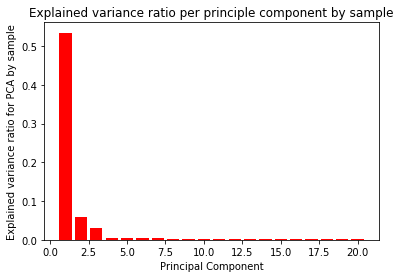

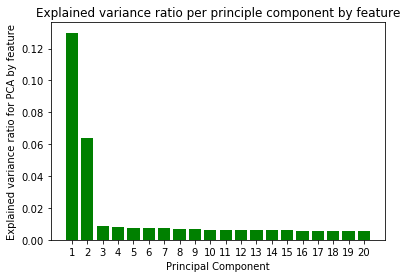

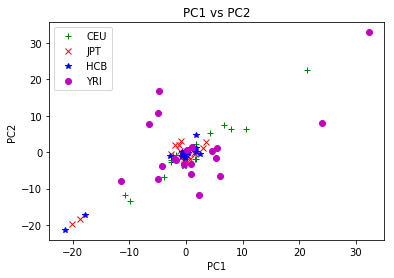

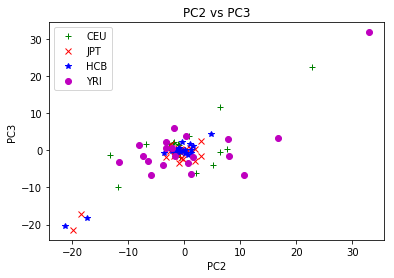

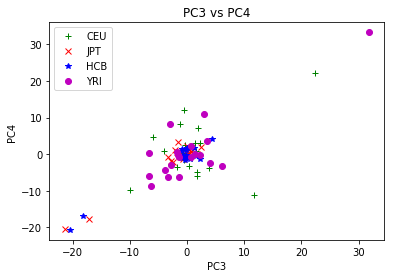

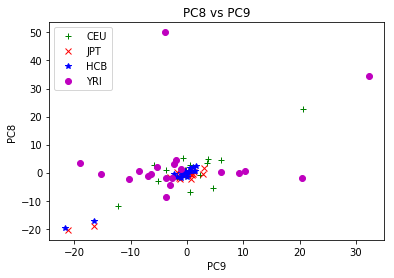

In [141]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = np.genfromtxt('genotype_population.csv', delimiter=',', skip_header=1)[:,1:]
scaled_data = np.zeros(data.shape)
mean = np.mean(data, axis=1)
std = np.std(data, axis=1, ddof=1)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        scaled_data[i][j] = (data[i][j] - mean[i]) / std[i]
        
transposed_scaled_data = scaled_data.transpose()
pca_features = PCA(n_components=20)
pca_samples = PCA(n_components=20)
pca_features.fit(scaled_data)
pca_samples.fit(transposed_scaled_data)

pca_samples_transform = pca_samples.transform(transposed_scaled_data)
pca_features_transform = pca_features.transform(scaled_data)

f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ind = np.arange(1,21,1)
ax1.bar(ind, pca_samples.explained_variance_ratio_ , width=0.8, color='r')
ax1.set_ylabel('Explained variance ratio for PCA by sample')
ax1.set_xlabel('Principal Component')
ax1.set_title('Explained variance ratio per principle component by sample')
ax2 = f2.add_subplot(111)
ax2.bar(ind, pca_features.explained_variance_ratio_, width=0.8, color='g')
ax2.set_ylabel('Explained variance ratio for PCA by feature')
ax2.set_xlabel('Principal Component')
ax2.set_title('Explained variance ratio per principle component by feature')
plt.xticks(ind)
plt.show()

population_data = []
with open('population_info.csv', 'r') as f:
    f.readline()
    for line in f:
        population_data.append(line.strip().split(','))

        
population_map = {}
for line in population_data:
    if population_map.get(line[2].strip('"')) == None:
        population_map[line[2].strip('"')] = []
    population_map[line[2].strip('"')].append(line[0].strip('"'))


ceu = population_map['CEU']
jpt = population_map['JPT']
hcb = population_map['HCB']
yri = population_map['YRI']

ceu_data = []
jpt_data = []
hcb_data = []
yri_data = []

for i in ceu:
    ceu_data.append(pca_features_transform[int(i) - 1])
    
for i in jpt:
    jpt_data.append(pca_features_transform[int(i) - 1])
    
for i in hcb:
    hcb_data.append(pca_features_transform[int(i) - 1])
    
for i in yri:
    yri_data.append(pca_features_transform[int(i) - 1])

f3 = plt.figure()
plt.plot(ceu_data[0], ceu_data[1], 'g+', label='CEU')
plt.plot(jpt_data[0], jpt_data[1], 'rx', label='JPT')
plt.plot(hcb_data[0], hcb_data[1], 'b*', label='HCB')
plt.plot(yri_data[0], yri_data[1], 'mo', label='YRI')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('PC1 vs PC2')
plt.legend(loc='upper left')

f4 = plt.figure()
plt.plot(ceu_data[1], ceu_data[2], 'g+', label='CEU')
plt.plot(jpt_data[1], jpt_data[2], 'rx', label='JPT')
plt.plot(hcb_data[1], hcb_data[2], 'b*', label='HCB')
plt.plot(yri_data[1], yri_data[2], 'mo', label='YRI')
plt.ylabel('PC3')
plt.xlabel('PC2')
plt.title('PC2 vs PC3')
plt.legend(loc='upper left')

f5 = plt.figure()
plt.plot(ceu_data[2], ceu_data[3], 'g+', label='CEU')
plt.plot(jpt_data[2], jpt_data[3], 'rx', label='JPT')
plt.plot(hcb_data[2], hcb_data[3], 'b*', label='HCB')
plt.plot(yri_data[2], yri_data[3], 'mo', label='YRI')
plt.ylabel('PC4')
plt.xlabel('PC3')
plt.title('PC3 vs PC4')
plt.legend(loc='upper left')

f6 = plt.figure()
plt.plot(ceu_data[7], ceu_data[8], 'g+', label='CEU')
plt.plot(jpt_data[7], jpt_data[8], 'rx', label='JPT')
plt.plot(hcb_data[7], hcb_data[8], 'b*', label='HCB')
plt.plot(yri_data[7], yri_data[8], 'mo', label='YRI')
plt.ylabel('PC8')
plt.xlabel('PC9')
plt.title('PC8 vs PC9')
plt.legend(loc='upper left')
plt.show()

93